In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector

In [2]:
conc = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Concrete Strength/Concrete_Data.csv")
X, y = conc.drop('Strength', axis=1), conc['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [3]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in features:
    for n in n_est:
        rf = RandomForestRegressor(random_state=25, max_features=f, n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, mean_absolute_error(y_test, y_pred)])
df_scores = pd.DataFrame( scores, columns=['features','trees', 'score'] )
df_scores.sort_values('score', ascending=True)

,features,trees,score
18,5,150,3.732742
19,5,200,3.742589
14,4,200,3.748906
17,5,100,3.754567
11,4,50,3.761124
10,4,25,3.768166
13,4,150,3.770464
12,4,100,3.785611
16,5,50,3.807758
9,3,200,3.826417


Feature Importance

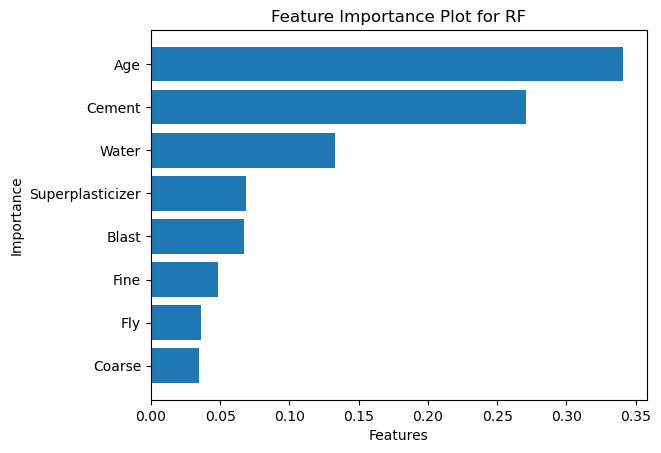

In [4]:
best_model = RandomForestRegressor(random_state=25, max_features=5, n_estimators=150)
best_model.fit(X, y)
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_model.feature_importances_}) 
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Feature Importance Plot for RF')
plt.show()